In [52]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)


from sklearn import preprocessing


import warnings
warnings.filterwarnings("ignore")

In [53]:
df = pd.read_csv("C:\\Users\\dtuni\\Downloads\\dissertation fraud etection\\PS_20174392719_1491204439457_log.csv")

In [54]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [55]:
df.tail(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [56]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [57]:
df.shape

(6362620, 11)

In [58]:
df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [59]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [60]:
df.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

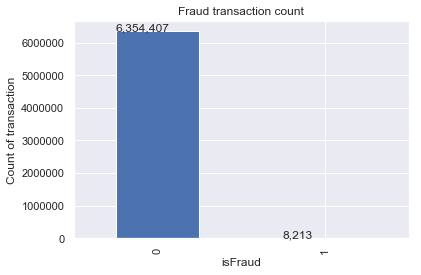

In [103]:
ax = pd.value_counts(df['isFraud'], sort = True).sort_index().plot(kind='bar', title="Fraud transaction count")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))
    ax.set_xlabel("isFraud")
    ax.set_ylabel("Count of transaction")
plt.show()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


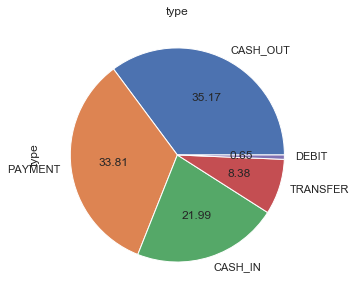

In [62]:
print(df['type'].value_counts())
df['type'].value_counts().plot.pie(autopct='%.2f',figsize=(5, 5))
plt.title('type')
plt.tight_layout()

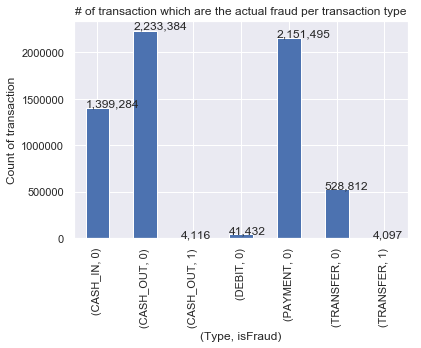

In [63]:
ax = df.groupby(['type', 'isFraud']).size().plot(kind='bar')
ax.set_title("# of transaction which are the actual fraud per transaction type")
ax.set_xlabel("(Type, isFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

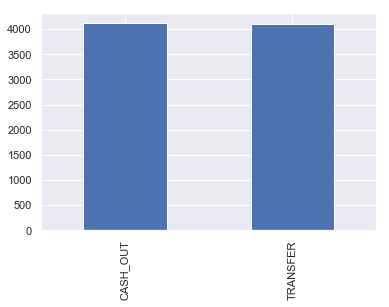

In [64]:
data_fraud = df[df.isFraud == 1] 
data_fraud.type.value_counts().plot.bar()

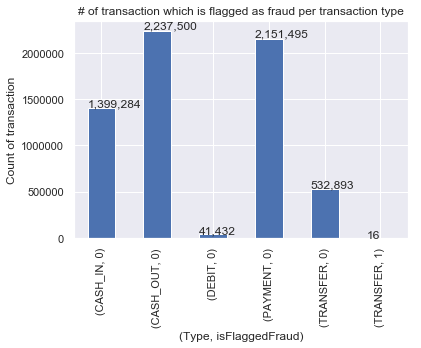

In [65]:
ax = df.groupby(['type', 'isFlaggedFraud']).size().plot(kind='bar')
ax.set_title("# of transaction which is flagged as fraud per transaction type")
ax.set_xlabel("(Type, isFlaggedFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

In [67]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


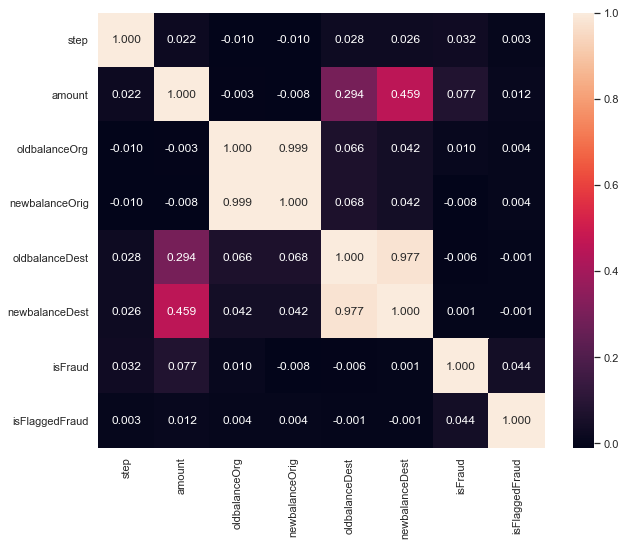

In [68]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True, fmt = '.3f')

In [69]:
df = df.drop(['oldbalanceDest','oldbalanceOrg'],axis = 1)

In [70]:
df.head()

,step,type,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,160296.36,M1979787155,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,19384.72,M2044282225,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,0.00,C553264065,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,0.00,C38997010,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,29885.86,M1230701703,0.0,0,0


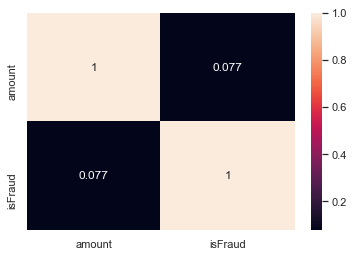

In [71]:
sns.heatmap(df[['amount','isFraud']].corr(),annot = True)

In [72]:
data = pd.get_dummies(df['type'], drop_first=True)

In [73]:
df = pd.concat([df,data],axis=1)

In [74]:
df.head()

,step,type,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,160296.36,M1979787155,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,19384.72,M2044282225,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,0.00,C553264065,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,0.00,C38997010,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,29885.86,M1230701703,0.0,0,0,0,0,1,0


In [75]:
df.drop(labels = ['type','nameOrig','nameDest'], axis=1,inplace=True)

In [76]:
df.head()

,step,amount,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,160296.36,0.0,0,0,0,0,1,0
1,1,1864.28,19384.72,0.0,0,0,0,0,1,0
2,1,181.00,0.00,0.0,1,0,0,0,0,1
3,1,181.00,0.00,0.0,1,0,1,0,0,0
4,1,11668.14,29885.86,0.0,0,0,0,0,1,0


In [77]:
X = df.drop(['isFraud'],axis=1)
y = df['isFraud']

In [101]:
print("Before UnderSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train==0)))

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X_rus, y_rus = rus.fit_sample(X, y)

print('After UnderSampling, the shape of train_X: {}'.format(X_rus.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(X_rus.shape))


Before UnderSampling, counts of label '1': 5764
Before UnderSampling, counts of label '0': 5734 

After UnderSampling, the shape of train_X: (16426, 9)
After UnderSampling, the shape of train_y: (16426, 9) 



In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size = 0.3, random_state = 42)

In [104]:

from sklearn.metrics import classification_report, auc, roc_curve 

In [81]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
lm_predict = logmodel.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
print("=== Model Accuracy ===")
acc_lm=accuracy_score(lm_predict,y_test)
print(acc_lm)
print('\n')
print("=== Confusion Matrix ===")
cm_lm = confusion_matrix(lm_predict,y_test)
print(cm_lm)

=== Model Accuracy ===
0.6879058441558441


=== Confusion Matrix ===
[[1162  221]
 [1317 2228]]


In [82]:
print("=== Classification Report ===")
print(classification_report(y_test, lm_predict))
print('\n')
print("=== All AUC Scores ===")
fpr_lm,recall_lm,thresholds_lm = roc_curve(y_test, lm_predict)
auc_lm=auc(fpr_lm, recall_lm)
print('AUC: %.2f' % auc_lm)

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.47      0.60      2479
           1       0.63      0.91      0.74      2449

   micro avg       0.69      0.69      0.69      4928
   macro avg       0.73      0.69      0.67      4928
weighted avg       0.73      0.69      0.67      4928



=== All AUC Scores ===
AUC: 0.69


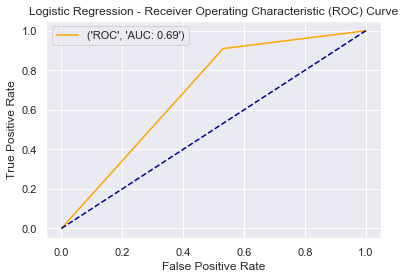

In [83]:
fpr_lm, tpr_lm, thresholds_lm = roc_curve(y_test, lm_predict)

def plot_roc_curve_lm(fpr_lm, tpr_lm):
    plt.plot(fpr_lm, tpr_lm, color='orange', label= ('ROC','AUC: %.2f' % auc_lm))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Logistic Regression - Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve_lm(fpr_lm, tpr_lm)


In [84]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, oob_score=False, n_jobs=-1, min_samples_leaf=1)
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)

# Check the accuracy score and confusion matrix
print("=== Model Accuracy ===")
acc_rfc=accuracy_score(rfc_predict,y_test)
print(acc_rfc)
print('\n')
print("=== Confusion Matrix ===")
cm_rfc = confusion_matrix(rfc_predict,y_test)
print(cm_rfc)

=== Model Accuracy ===
0.929788961038961


=== Confusion Matrix ===
[[2324  191]
 [ 155 2258]]


In [85]:
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
fpr_rfc, recall_rfc, thresholds_rfc = roc_curve(y_test, rfc_predict)
auc_rfc=auc(fpr_rfc, recall_rfc)
print('AUC: %.2f' % auc_rfc)

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2479
           1       0.94      0.92      0.93      2449

   micro avg       0.93      0.93      0.93      4928
   macro avg       0.93      0.93      0.93      4928
weighted avg       0.93      0.93      0.93      4928



=== All AUC Scores ===
AUC: 0.93


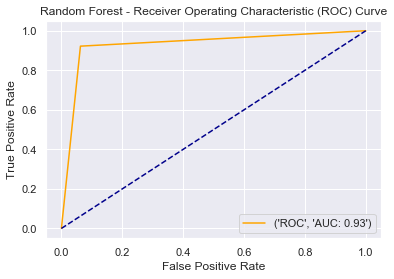

In [86]:
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, rfc_predict)

def plot_roc_curve_rfc(fpr_rfc, tpr_rfc):
    plt.plot(fpr_rfc, tpr_rfc, color='orange', label= ('ROC','AUC: %.2f' % auc_rfc))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Random Forest - Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve_rfc(fpr_rfc, tpr_rfc)

In [87]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=10)
dtree.fit(X_train,y_train)
dtree_predict = dtree.predict(X_test)

# Check the accuracy score and confusion matrix
print("=== Model Accuracy ===")
acc_dtree=accuracy_score(dtree_predict,y_test)
print(acc_dtree)
print('\n')
print("=== Confusion Matrix ===")
cm_dtree = confusion_matrix(dtree_predict,y_test)
print(cm_dtree)

=== Model Accuracy ===
0.9281655844155844


=== Confusion Matrix ===
[[2372  247]
 [ 107 2202]]


In [88]:
print("=== Classification Report ===")
print(classification_report(y_test, dtree_predict))
print('\n')
print("=== All AUC Scores ===")
fpr_dtree, recall_dtree, thresholds_dtree = roc_curve(y_test, dtree_predict)
auc_dtree=auc(fpr_dtree, recall_dtree)
print('AUC: %.2f' % auc_dtree)

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2479
           1       0.95      0.90      0.93      2449

   micro avg       0.93      0.93      0.93      4928
   macro avg       0.93      0.93      0.93      4928
weighted avg       0.93      0.93      0.93      4928



=== All AUC Scores ===
AUC: 0.93


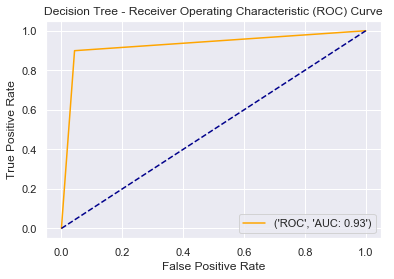

In [89]:
fpr_dtree, tpr_dtree, thresholds_dtree = roc_curve(y_test, dtree_predict)

def plot_roc_curve_dtree(fpr_dtree, tpr_dtree):
    plt.plot(fpr_dtree, tpr_dtree, color='orange', label= ('ROC','AUC: %.2f' % auc_dtree))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Decision Tree - Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve_dtree(fpr_dtree, tpr_dtree)

In [90]:

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb_predict = xgb.predict(X_test)

# Check the accuracy score and confusion matrix
print("=== Model Accuracy ===")
acc_xgb=accuracy_score(xgb_predict,y_test)
print(acc_xgb)
print('\n')
print("=== Confusion Matrix ===")
cm_xgb = confusion_matrix(xgb_predict,y_test)
print(cm_xgb)

=== Model Accuracy ===
0.9318181818181818


=== Confusion Matrix ===
[[2374  231]
 [ 105 2218]]


In [91]:
print("=== Classification Report ===")
print(classification_report(y_test, xgb_predict))
print('\n')
print("=== All AUC Scores ===")
fpr_xgb, recall_xgb, thresholds_xgb = roc_curve(y_test, xgb_predict)
auc_xgb=auc(fpr_xgb, recall_xgb)
print('AUC: %.2f' % auc_xgb)

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2479
           1       0.95      0.91      0.93      2449

   micro avg       0.93      0.93      0.93      4928
   macro avg       0.93      0.93      0.93      4928
weighted avg       0.93      0.93      0.93      4928



=== All AUC Scores ===
AUC: 0.93


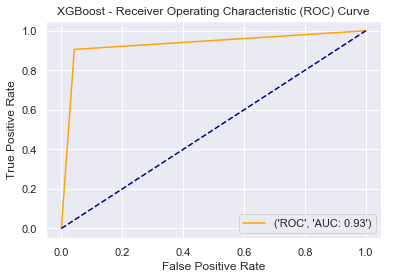

In [92]:
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb_predict)

def plot_roc_curve_xgb(fpr_xgb, tpr_xgb):
    plt.plot(fpr_xgb, tpr_xgb, color='orange', label= ('ROC','AUC: %.2f' % auc_xgb))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('XGBoost - Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve_xgb(fpr_xgb, tpr_xgb)

In [93]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=18)
neighbors.fit(X_train,y_train)
neighbors_predict = neighbors.predict(X_test)

# Check the accuracy score and confusion matrix
print("=== Model Accuracy ===")
acc_neighbors=accuracy_score(neighbors_predict,y_test)
print(acc_neighbors)
print('\n')
print("=== Confusion Matrix ===")
cm_neighbors = confusion_matrix(neighbors_predict,y_test)
print(cm_neighbors)

=== Model Accuracy ===
0.8238636363636364


=== Confusion Matrix ===
[[2204  593]
 [ 275 1856]]


In [94]:
print("=== Classification Report ===")
print(classification_report(y_test, neighbors_predict))
print('\n')
print("=== All AUC Scores ===")
fpr_neighbors, recall_neighbors, thresholds_neighbors = roc_curve(y_test, neighbors_predict)
auc_neighbors=auc(fpr_neighbors, recall_neighbors)
print('AUC: %.2f' % auc_neighbors)

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      2479
           1       0.87      0.76      0.81      2449

   micro avg       0.82      0.82      0.82      4928
   macro avg       0.83      0.82      0.82      4928
weighted avg       0.83      0.82      0.82      4928



=== All AUC Scores ===
AUC: 0.82


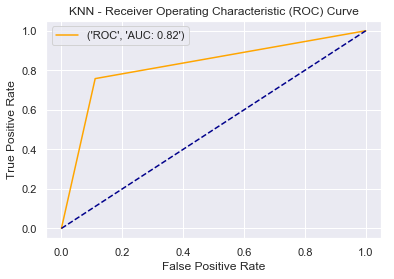

In [95]:
fpr_neighbors, tpr_neighbors, thresholds_neighbors = roc_curve(y_test, neighbors_predict)

def plot_roc_curve_neighbors(fpr_neighbors, tpr_neighbors):
    plt.plot(fpr_neighbors, tpr_neighbors, color='orange', label= ('ROC','AUC: %.2f' % auc_neighbors))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('KNN - Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve_neighbors(fpr_neighbors, tpr_neighbors)

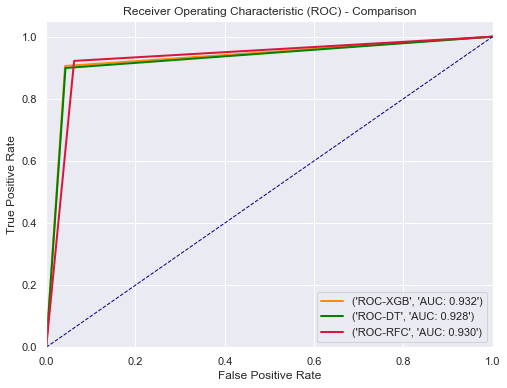

In [110]:

plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 14})
plt.plot(fpr_xgb, tpr_xgb, color='darkorange',lw=2, label= ('ROC-XGB','AUC: %.3f' % auc_xgb))

plt.plot(fpr_dtree, tpr_dtree, color='green',lw=2 ,label= ('ROC-DT','AUC: %.3f' % auc_dtree))

plt.plot(fpr_rfc, tpr_rfc, color='crimson',lw=2, label= ('ROC-RFC','AUC: %.3f' % auc_rfc))

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Comparison')
plt.show()



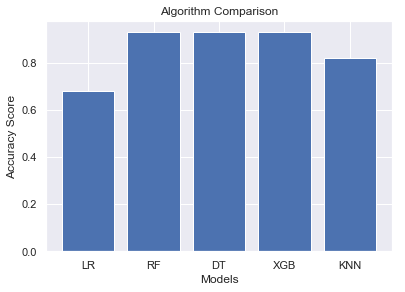

In [99]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.8,0.8])
algo = ['LR','RF', 'DT', 'XGB','KNN']
acc = [0.68,0.93,0.93,0.93,0.82]
ax.bar(algo,acc)
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy Score')
ax.set_title('Algorithm Comparison')
plt.show()